In [33]:
from tensorflow.keras import models
import pandas as pd
import numpy as np

In [34]:
model1=models.load_model("Models/model2_R.h5")

In [35]:
test=pd.read_csv("DailyDelhiClimateTrain.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [36]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [37]:
test["date"]=pd.to_datetime(test["date"])
test.set_index("date",inplace=True)
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [38]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])

In [39]:
def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

In [40]:
def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [41]:
test.reset_index(inplace=True)

In [42]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [43]:
test
temp=test.drop(["wind_speed"],axis=1)
temp=temp.append(test["wind_speed"])
# temp

In [44]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
day             0
month           0
year            0
dtype: int64

In [45]:
test=test.drop(["date"],axis=1)
test

,meantemp,humidity,wind_speed,meanpressure,day,month,year
0,10.000000,84.500000,0.000000,1015.666667,1,1,2013
1,7.400000,92.000000,2.980000,1017.800000,2,1,2013
2,7.166667,87.000000,4.633333,1018.666667,3,1,2013
3,8.666667,71.333333,1.233333,1017.166667,4,1,2013
4,6.000000,86.833333,3.700000,1016.500000,5,1,2013
...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,28,12,2016
1458,15.238095,87.857143,6.000000,1016.904762,29,12,2016
1459,14.095238,89.666667,6.266667,1017.904762,30,12,2016
1460,15.052632,87.000000,7.325000,1016.100000,31,12,2016


In [46]:
X_part=test.drop(["meantemp"],axis=1)
X_part=X_part[['humidity','meanpressure','wind_speed','day','month','year']]
X_part

,humidity,meanpressure,wind_speed,day,month,year
0,84.500000,1015.666667,0.000000,1,1,2013
1,92.000000,1017.800000,2.980000,2,1,2013
2,87.000000,1018.666667,4.633333,3,1,2013
3,71.333333,1017.166667,1.233333,4,1,2013
4,86.833333,1016.500000,3.700000,5,1,2013
...,...,...,...,...,...,...
1457,68.043478,1015.565217,3.547826,28,12,2016
1458,87.857143,1016.904762,6.000000,29,12,2016
1459,89.666667,1017.904762,6.266667,30,12,2016
1460,87.000000,1016.100000,7.325000,31,12,2016


In [47]:
Y_part=test["meantemp"]
X_part=np.array(X_part)
Y_part=np.array(Y_part).reshape(-1,1)
print(X_part.shape)
print(Y_part.shape)

(1462, 6)
(1462, 1)


In [48]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [49]:
scaler2=MinMaxScaler(feature_range=[-1,1])
X_part_scaled=scaler2.fit_transform(X_part)
Y_part_scaled=scaler2.fit_transform(Y_part)

In [50]:
step=30
input=[]
output=[]
for i in range(len(X_part_scaled)-(step)):
    input.append(X_part_scaled[i:i+step])
    output.append(Y_part_scaled[i+step])
 
input=np.array(input)
output=np.array(output)

print(input.shape)
print(output.shape)

(1432, 30, 6)
(1432, 1)


In [51]:
temp_rs=model1.predict(input)

In [52]:
temp_rs=scaler2.inverse_transform(temp_rs)
temp_rs

array([[13.432537],
       [14.211804],
       [16.034498],
       ...,
       [15.139082],
       [10.606809],
       [ 9.202572]], dtype=float32)

In [63]:
test=pd.read_csv("DailyDelhiClimateTrain.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [64]:
timeseries_test=test.copy()
timeseries_test["date"].dtype
timeseries_test["date"]=pd.to_datetime(timeseries_test["date"])
timeseries_test.set_index("date",inplace=True)
timeseries_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [65]:
test_data_temp=pd.DataFrame(list(timeseries_test["meantemp"]),columns=["temp"])
test_data_temp

,temp
0,10.000000
1,7.400000
2,7.166667
3,8.666667
4,6.000000
...,...
1457,17.217391
1458,15.238095
1459,14.095238
1460,15.052632


In [66]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
test_data_temp=scaler.fit_transform(test_data_temp)

In [67]:
steps=30
X_test=[]
Y_test=[]
for i in range(len(test_data_temp)-steps):
  X_test.append(test_data_temp[i:i+steps])
  Y_test.append(test_data_temp[i+steps])
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(1432, 30, 1)
(1432, 1)


In [68]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(1432, 30, 1)
(1432, 1)


In [69]:
model2=models.load_model("Models/model1_ts.h5")

In [70]:
temp_ts=model2.predict(X_test)
temp_ts=scaler.inverse_transform(temp_ts)
temp_ts

array([[16.910427],
       [17.126644],
       [16.53031 ],
       ...,
       [14.78222 ],
       [15.143902],
       [14.045676]], dtype=float32)

In [71]:
temp_f=(temp_ts+temp_rs)/2
temp_f

array([[15.171482],
       [15.669224],
       [16.282404],
       ...,
       [14.960651],
       [12.875355],
       [11.624125]], dtype=float32)

In [72]:
Y_test_inv=scaler.inverse_transform(Y_test)

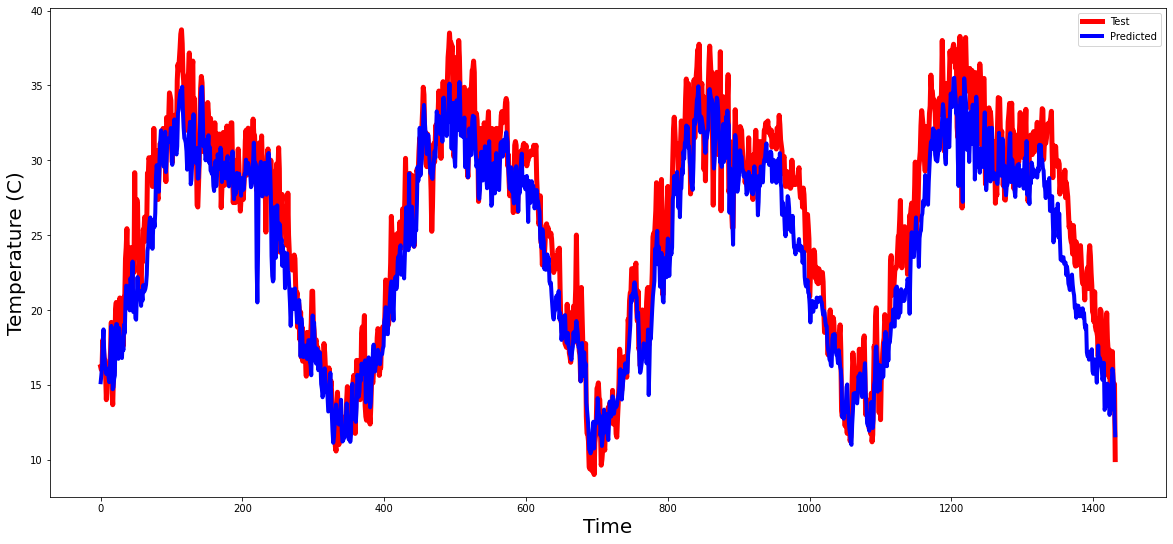

In [73]:
# Y_test_inv=Y_test_inv[:200]
# temp_f=temp_f[:200]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_f,'blue' , linewidth=4)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [75]:
Y_test_inv

array([[16.2       ],
       [16.        ],
       [16.28571429],
       ...,
       [14.0952381 ],
       [15.05263158],
       [10.        ]])

In [76]:
temp_f

array([[15.171482],
       [15.669224],
       [16.282404],
       ...,
       [14.960651],
       [12.875355],
       [11.624125]], dtype=float32)

In [81]:
mse=mean_squared_error(Y_test_inv,temp_f)
mae=mean_absolute_error(Y_test_inv,temp_f)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_f)}')

6.704085983755391 2.0985046879815497 0.8684748032493032


In [80]:
from sklearn import metrics
mse=mean_squared_error(Y_test_inv,temp_rs)
mae=mean_absolute_error(Y_test_inv,temp_rs)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_rs)}')

20.563218293927353 3.64060707774925 0.5965771712221817


In [147]:
mse=mean_squared_error(Y_test_inv,temp_ts)
mae=mean_absolute_error(Y_test_inv,temp_ts)
print(f'{mse} {mae} {metrics.r2_score(Y_test_inv,temp_ts)}')

4.798618353708427 1.7167213752096082 0.8618039760821435


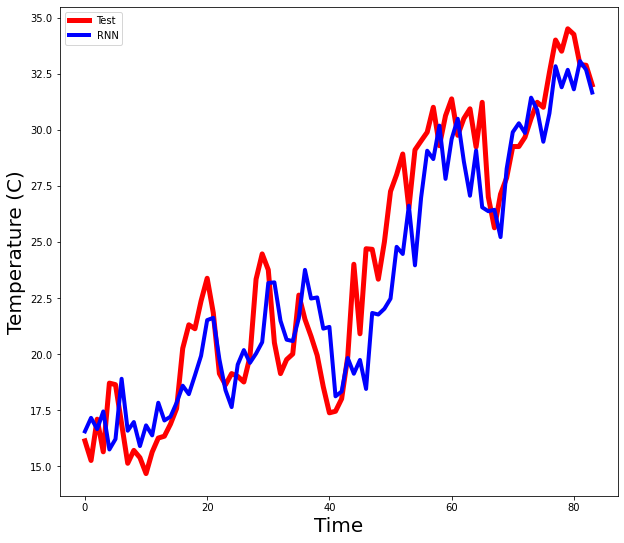

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_ts,'blue' , linewidth=4)
# plt.plot(temp_rs , 'black', linewidth=5)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','RNN','Regression'))
plt.show()

In [148]:
from sklearn import metrics
metrics.r2_score(Y_test_inv,temp_f)

0.13656428248553143